In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import Ridge, Lasso

# Task 1 (3 points + 2 points for a well organized and easy to read plot + 1 point for the short comment)

Consider the following toy dataset with pairs of correlated features:

In [3]:
def gen_data(N, correlation=0.5):
  # start from 4 independent features:
  X = np.random.uniform(-1., 1., size=(N, 4))

  y = X @ [2.3, -4.7, -1.7, 3.2] # true dependence

  # add correlations, so that X[:,0] correlates with X[:,2] and
  # X[:,1] correlates with X[:,3]:
  X[:,2:] = correlation * X[:,:2] + (1 - correlation) * X[:,2:]

  # add some noise to the targets
  y += np.random.normal(size=y.shape)

  return X, y

Fit this dataset with Ridge and Lasso (**without the bias term!**), for different correlation levels and various regularization powers.

Separately for Ridge and Lasso, and separately for different correlation levels, plot the fitted parameter values as a function of regularization power (x-axis in log scale). Make sure to make some color and pattern coding to make it clear which parameters correspond to correlating groups of features, e.g.:
```python
# Same color (red), different patterns (solid vs dashed) for features 0 and 2
plt.plot(alpha_values, param_0, color='red', label='0')
plt.plot(alpha_values, param_2, '--', color='red', label='2')

# Same color (blue), different patterns (solid vs dashed) for features 1 and 3
plt.plot(alpha_values, param_1, color='blue', label='1')
plt.plot(alpha_values, param_3, '--', color='blue', label='3')
```
Please also add legends, axis labels and/or titles to be able to understand what's shown on this or that plot.

What do you observe? How regularization affects the two kinds of models for different correlation levels? Write a short comment.

In [52]:
from tqdm import tqdm

all_ridge = []
all_lasso = []
correlations = [0.1, 0.5, 0.9]
for correlation in correlations:
  # dataset to fit (no need to split into train/test in this task):
  X, y = gen_data(500, correlation)

  # regularization powers:
  alpha_values = np.logspace(-4, 4, 100, base=10)

  # lists to collect models' parameters:
  params_ridge = []
  params_lasso = []

  for alpha in tqdm(alpha_values):
    model_r = Ridge(alpha=alpha, max_iter=100000, fit_intercept=False)
    model_r.fit(X, y)
    params_ridge.append(model_r.coef_)
    model_l = Lasso(alpha=alpha, max_iter=100000, fit_intercept=False)
    model_l.fit(X, y)
    params_lasso.append(model_l.coef_)

  params_ridge = np.array(params_ridge)
  all_ridge.append(params_ridge)
  params_lassso = np.array(params_lasso)
  all_lasso.append(params_lasso)

all_ridge = np.array(all_ridge)
all_lasso = np.array(all_lasso)

100%|██████████| 100/100 [00:00<00:00, 812.89it/s]


Изобразим связанные пары одним стилем (0,2) - пунктиром и (1,3) - сплошной.

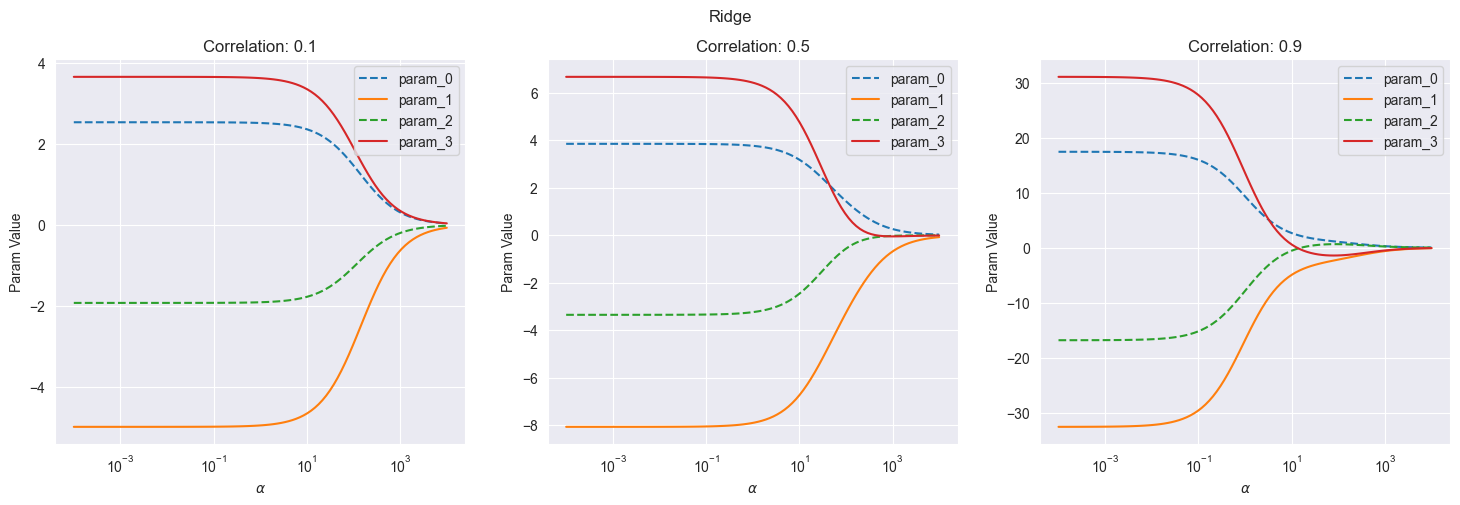

In [73]:
plt.figure(figsize=(18, 5))
plt.suptitle('Ridge')
for i in range(3):
  plt.subplot(1, 3, i+1)
  plt.plot(alpha_values, all_ridge[i,:,0], '--', label='param_0')
  plt.plot(alpha_values, all_ridge[i,:,1], label='param_1')
  plt.plot(alpha_values, all_ridge[i,:,2], '--', label='param_2')
  plt.plot(alpha_values, all_ridge[i,:,3], label='param_3')
  plt.legend(loc=1)
  plt.xscale('log')
  plt.title(f'Correlation: {correlations[i]}')
  plt.xlabel(r'$\alpha$')
  plt.ylabel('Param Value')

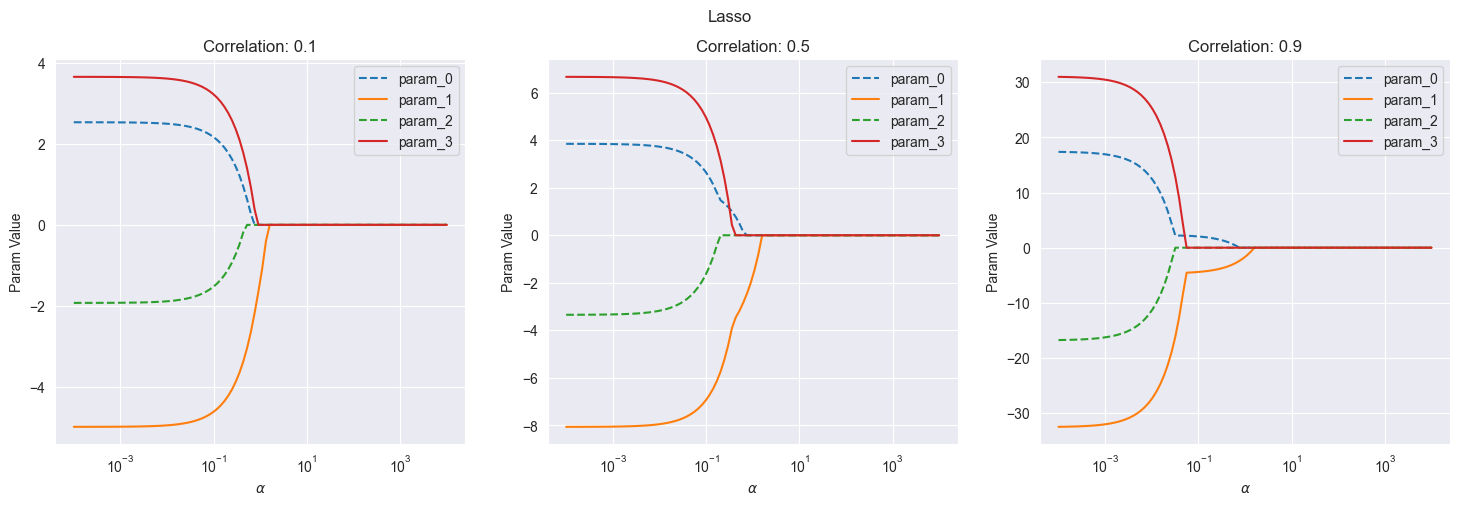

In [74]:
plt.figure(figsize=(18, 5))
plt.suptitle('Lasso')
for i in range(3):
  plt.subplot(1, 3, i+1)
  plt.plot(alpha_values, all_lasso[i,:,0], '--', label='param_0')
  plt.plot(alpha_values, all_lasso[i,:,1], label='param_1')
  plt.plot(alpha_values, all_lasso[i,:,2], '--', label='param_2')
  plt.plot(alpha_values, all_lasso[i,:,3], label='param_3')
  plt.legend(loc=1)
  plt.xscale('log')
  plt.title(f'Correlation: {correlations[i]}')
  plt.xlabel(r'$\alpha$')
  plt.ylabel('Param Value')

#### В результате наблюдаем следующее:
* Для значений $\alpha < 10^{-3}$ никакая из двух регуляризаций практически не оказывает воздействия
* Чем больше уровень корреляции, тем раньше начинает включаться регуляризация
* L1 почти всегда начинает влиять на значения примерно на 2 порядка раньше, чем L2
* Значение $\alpha ~ 10^{-2}$ почти всегда хватает, чтобы все коэффициенты были в окрестности нуля
* Чем больше уровень корреляции, тем раньше по одной переменной из каждой связанной пары окажется в районе нуля (L2) или равной нулю (L1)
* Чем больше уровень корреляции, тем больше по модулю значения коэффициентов
* При L1 в момент обнуления одной переменной из спаренной пары другая начинает резко вести себя иначе
* Из очевидного: L1, в отличие от L2, полностью обнуляет коэффициенты.

# Всё ниже вроде как в задании уже не требуется

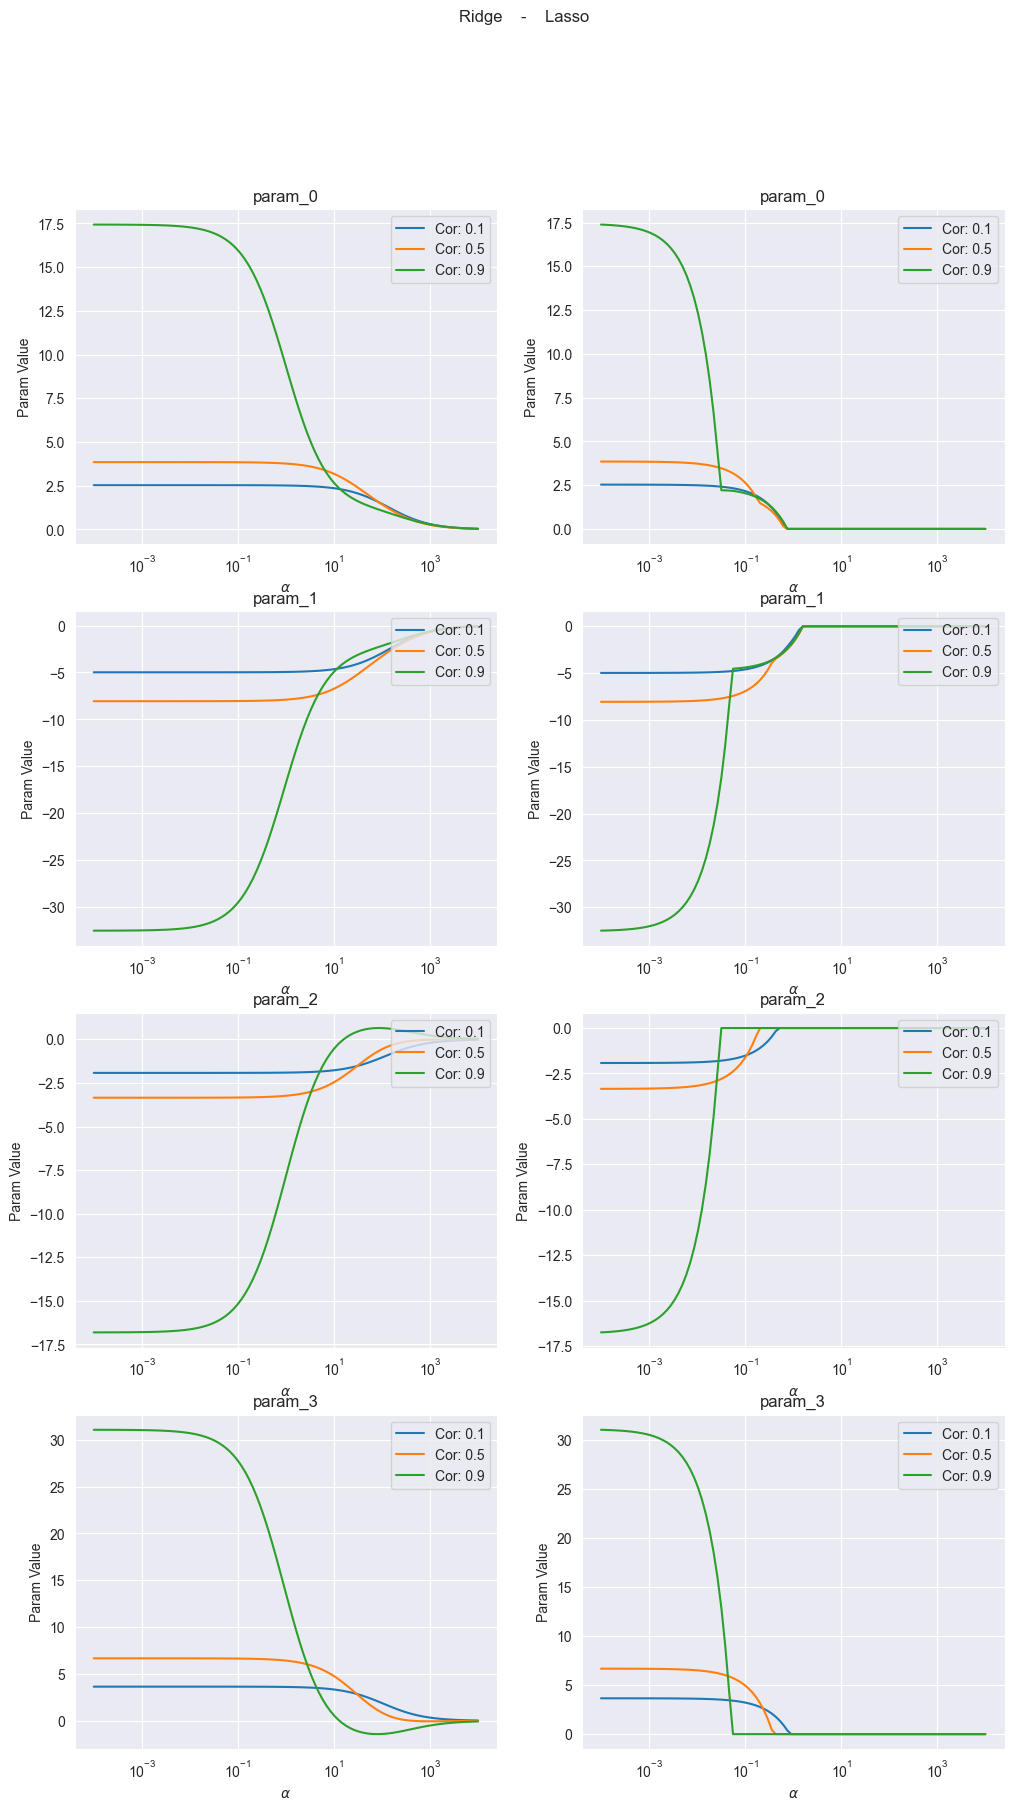

In [70]:
plt.figure(figsize=(12, 20))
plt.suptitle('Ridge    -    Lasso')
for i in range(4):
  plt.subplot(4, 2, 2*i+1)
  plt.plot(alpha_values, all_ridge[0,:,i], label=f'Cor: {correlations[0]}')
  plt.plot(alpha_values, all_ridge[1,:,i], label=f'Cor: {correlations[1]}')
  plt.plot(alpha_values, all_ridge[2,:,i], label=f'Cor: {correlations[2]}')
  plt.legend(loc=1)
  plt.xscale('log')
  plt.title(f'param_{i}')
  plt.xlabel(r'$\alpha$')
  plt.ylabel('Param Value')


  plt.subplot(4, 2, 2*i+2)
  plt.plot(alpha_values, all_lasso[0,:,i], label=f'Cor: {correlations[0]}')
  plt.plot(alpha_values, all_lasso[1,:,i], label=f'Cor: {correlations[1]}')
  plt.plot(alpha_values, all_lasso[2,:,i], label=f'Cor: {correlations[2]}')
  plt.legend(loc=1)
  plt.xscale('log')
  plt.title(f'param_{i}')
  plt.xlabel(r'$\alpha$')
  plt.ylabel('Param Value')